 # Used Car Price Prediction using Machine Learning

### `Problem Statement:`
The used car market is large and growing day by day, with millions of used `cars` sold each year. In these times as we explore through automobile websites in search of buying or selling a used car, the price that we feel is not
accurate enough. Sometimes the buying price is high or sometimes the selling price is too low. This puts us in a confusing state whether to buy or sell the car at that price. Deciding whether a used car is worth the
posted price when we see listings online can be difficult. Several factors, including `KM Driven`, `Fuel Type`, `No. of Owner`, `Year`, etc. can influence the actual worth of a car. From the perspective of a seller, it is also a dilemma to price a used car appropriately.

Based on existing data, our aim is to use machine learning algorithms to develop models for **predicting used car prices**.
In this way both buyers and sellers get a satisfactory price. Helping to ensure fair pricing and efficient transactions.

**$Essentially$** --
- The aim is to build a model that can accurately predict the price of a used car, based on the data available, in order to assist buyers and sellers in making informed decisions.
- The model analyze the current market trends and provide insights into the most important factors **affecting** the **price** of a used **car**.
- The model will be trained on a large dataset of used car sales, and evaluated using various **performance metrics** to ensure its **accuracy** and reliability.


# Reading and Understanding the Data

## The Attributes include:
- **S.NO**             :  Serial Number
- **Name**             :  Model name of car
- **Location**         :  Name of cities from where the car belongs to.
- **Year**             :  Year of registration with Road Transport Athority
- **Kilometers_Driven**:  Number of the kilometers traveled by the vehical in `Kms`.
- **Fuel_Type**        :  Type of Fuel of the vehical
                                    * Diesel      
                                    * Petrol      
                                    * CNG           
                                    * LPG           
                                    * Electric       
- **Transmission**     :  Information about the type of transmission that a car has.
                                    * Manual
                                    * Automatic
- **Owner_Type**       :  Information about the class of ownership of the car.
                                    * First
                                    * Second
                                    * Third
                                    * Fourth & Above
- **Mileage**          :  Fuel efficiency , measured in `kilometers per liter ( kmpl )`
- **Engine**           :  Size of the engine in `Cubic Centimeters ( CC )`
- **Power**            :  Power of the engine in `Brake Horsepower ( bhp )`
- **Seats**            :  Number of seates that a car has.
- **New_Price**        :  Original price of the car.
- **Price**            :  Current market price of the car.

**Target Variable -- Price** 

**DataFrame -- df**

In [180]:
# Importing necessary libraries and also suppressing Warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline                 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [181]:
# Importing Datatset

df = pd.read_csv('carsData.csv')
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Exploratory Data Analysis 
We will explore the various feature variables and draw information about how significant each variable is.

### Checking various Aspects of the Dataset

In [182]:
# Checking Shape

df.shape

(7253, 14)

* As we can see our dataset contain `7253 rows` and `14 columns`

In [183]:
#Checking Attribute names

df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [80]:
# Info of the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [184]:
# Checking missing entries

print(df.isna().sum())
print("Toatl number of missing values in the dataset : ",df.isnull().sum().sum())

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64
Toatl number of missing values in the dataset :  7628


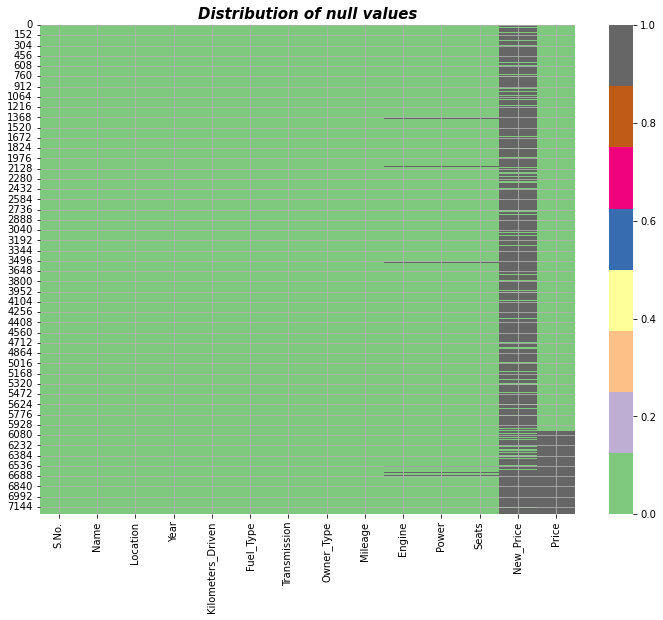

In [7]:
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull(),cbar=True, cmap='Accent')
plt.title("Distribution of null values",size=15,style="italic",fontweight="bold")
plt.grid(True)
plt.show()

In [185]:
# Percentage of missing data

null_percentage=round((df.isna().sum()/df.shape[0])*100,2)
null_percentage

S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64

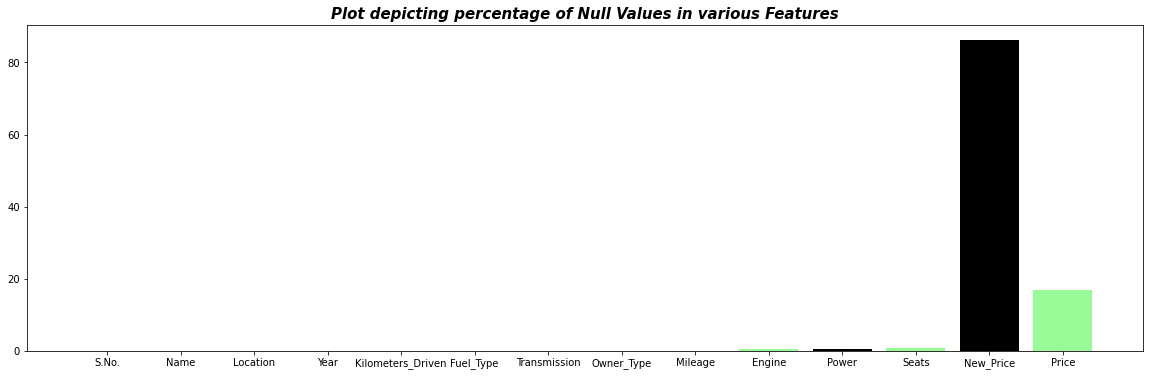

In [186]:
plt.figure(figsize=(20,6))
plt.bar(df.columns,null_percentage,color=["black","palegreen"])
plt.title("Plot depicting percentage of Null Values in various Features",size=15,
          style="italic",fontweight="bold")
plt.show()

* As we can see from the above plot `New_Price` column has 86% of data missing so its better to drop the column altogether and also `S.No` has no significance so it is being dropped.

In [187]:
df.drop(['S.No.','New_Price'],axis=1,inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [188]:
# Checking Duplicates

df.duplicated().sum()

1

In [189]:
# dropping Duplicates

df.drop_duplicates(inplace=True)

In [190]:
df.duplicated().sum()

0

In [191]:
# Converting Year to Number_of_Years

df['Year']=df['Year'].apply(lambda x: 2023-x)

In [192]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,13,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,8,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50


### Predictors of the Dataset

**Categorical Features**- 'Name', 'Location','Fuel_Type',
                         'Transmission', 'Owner_Type'.

**Continuous Features** - 'Kilometers_Driven','Mileage', 'Engine', 'Power',                               'Seats'.
Variables `Mileage`, `Engine`, `Power` contain some text data like `kmpl`,`CC`,`bhp`. So we can remove those text data.

In [193]:
cc_df = df["Engine"].str.split(" ", expand = True)
cc_df.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [194]:
df["Engine"] = pd.to_numeric(cc_df[0], errors = 'coerce')

In [195]:
kmpl_df= df['Mileage'].str.split(" ",expand=True)
df['Mileage']=pd.to_numeric(kmpl_df[0],errors='coerce')
bhp_df= df['Power'].str.split(" ",expand=True)
df['Power']=pd.to_numeric(bhp_df[0],errors='coerce')

In [196]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,12,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50


In [197]:
# Renaming columns - Mileage, Engine, Power

df.rename(columns={"Year":"Years","Mileage":"Mileage(Kmpl)","Engine":"Engine(CC)","Power":"Power(bhp)"},inplace=True)

In [198]:
df.head(2)

,Name,Location,Years,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50


In [199]:
new_name_df= df["Name"].str.split(" ",expand= True)
new_name_df.head()

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None


In [200]:
#df.head()
df['Manufacturer']=new_name_df[0]

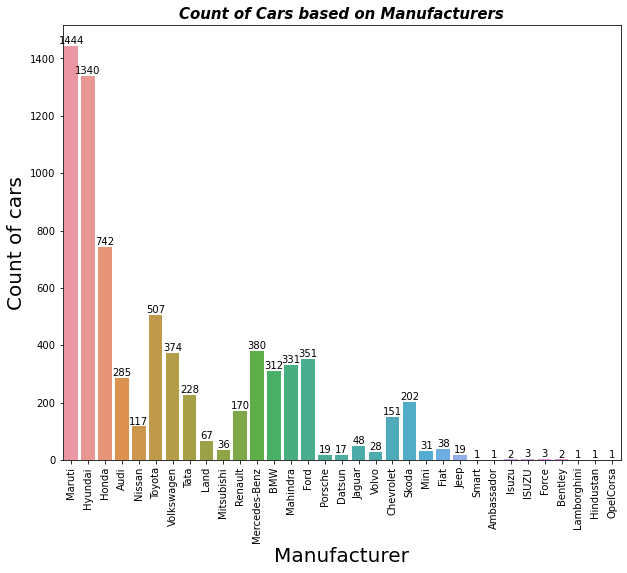

In [201]:
# Ploting the companies
plt.figure(figsize = (10,8))
plot = sns.countplot(x = 'Manufacturer', data = df )
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of Cars based on Manufacturers",fontsize=15,style="italic",fontweight="bold")
plt.xlabel("Manufacturer",fontsize=20)
plt.ylabel("Count of cars",fontsize=20)
#plt.grid(True)
plt.show()

* Maximum `cars` in the dataset are by the manufacturer **Maruti**.

In [202]:
categorical = ['Name', 'Location','Fuel_Type', 'Transmission', 'Owner_Type']
for i in categorical:
    unique_classes=df[i].unique()
    print(unique_classes)

['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


In [203]:
categorical = ['Name', 'Location','Fuel_Type', 'Transmission', 'Owner_Type']
for i in categorical:
    print(unique_classes)
    count=df[i].value_counts()
    total_unique=df[i].count()
    percentage=(count/total_unique)*100
    print(percentage)       

['First' 'Second' 'Fourth & Above' 'Third']
Mahindra XUV500 W8 2WD                  0.758411
Maruti Swift VDI                        0.675676
Maruti Swift Dzire VDI                  0.579151
Honda City 1.5 S MT                     0.537783
Maruti Swift VDI BSIV                   0.510204
                                          ...   
Chevrolet Beat LT Option                0.013789
Skoda Rapid 1.6 MPI AT Elegance Plus    0.013789
Ford EcoSport 1.5 TDCi Ambiente         0.013789
Hyundai i10 Magna 1.1 iTech SE          0.013789
Hyundai Elite i20 Magna Plus            0.013789
Name: Name, Length: 2041, dtype: float64
['First' 'Second' 'Fourth & Above' 'Third']
Mumbai        13.072256
Hyderabad     12.079426
Coimbatore    10.645339
Kochi         10.645339
Pune          10.548814
Delhi          9.100938
Kolkata        9.018202
Chennai        8.149476
Jaipur         6.880860
Bangalore      6.067292
Ahmedabad      3.792057
Name: Location, dtype: float64
['First' 'Second' 'Fourth & Above' 'T

Created this loop to figure out `unique` values and their percentile

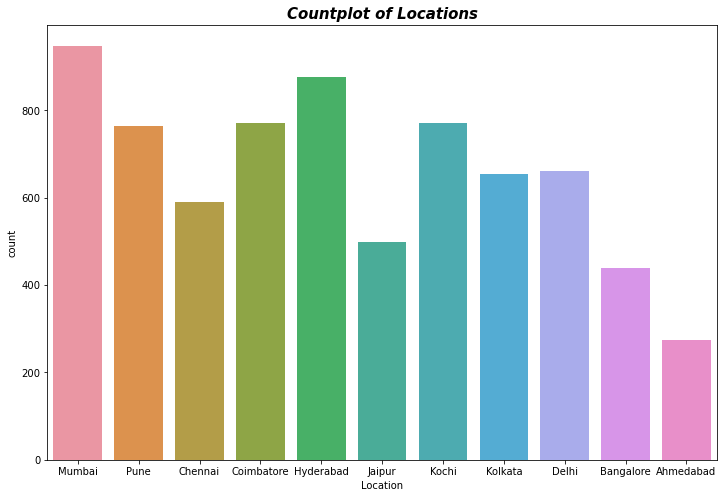

In [204]:
plt.figure(figsize=(12,8))
sns.countplot(df['Location'])
plt.title("Countplot of Locations",fontsize=15,style="italic",fontweight="bold")
plt.show()

* As we can see, cars belongs to almost all the cities but `Mumbai`,`Hyderabad`,`Pune`, `Coimbatore` and `Kochi` has maximum cars available for sale.

In [205]:
df.drop(['Location','Name'],axis=1,inplace=True)

In [206]:
df.head(2)

,Years,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price,Manufacturer
0,13,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,8,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai


### Statistical summary

In [207]:
# Now cheaking the statistical info of the dataset

df. 

,Years,Kilometers_Driven,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price
count,7252.000000,7.252000e+03,7250.000000,7206.000000,7077.000000,7199.000000,6019.000000
mean,9.634170,5.869999e+04,18.141738,1616.590064,112.764474,5.279761,9.479468
std,3.254405,8.443351e+04,4.562492,595.324779,53.497297,0.811709,11.187917
min,4.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,7.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,9.000000,5.342900e+04,18.160000,1493.000000,94.000000,5.000000,5.640000
75%,12.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000
max,27.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


<Figure size 1440x1440 with 0 Axes>

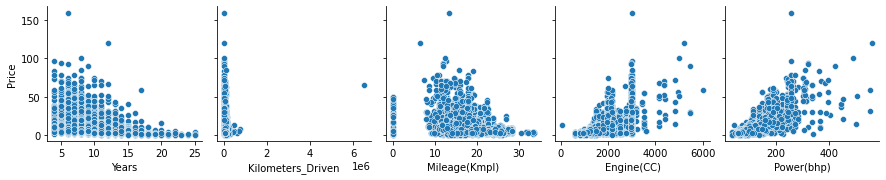

In [208]:
# Plot relationship between features and target variable

plt.figure(figsize=(20,20))
sns.pairplot(df, x_vars=['Years', 'Kilometers_Driven', 'Mileage(Kmpl)', 'Engine(CC)', 'Power(bhp)'], y_vars='Price')
plt.show()

* As we can see from the above plot, Price is significantly increasing with respect to `Engine(CC)` and `Power(bhp)`. 
And `Price` is gradually increasing with `Year`,it is because of Brand Name of the car might be affecting the price.

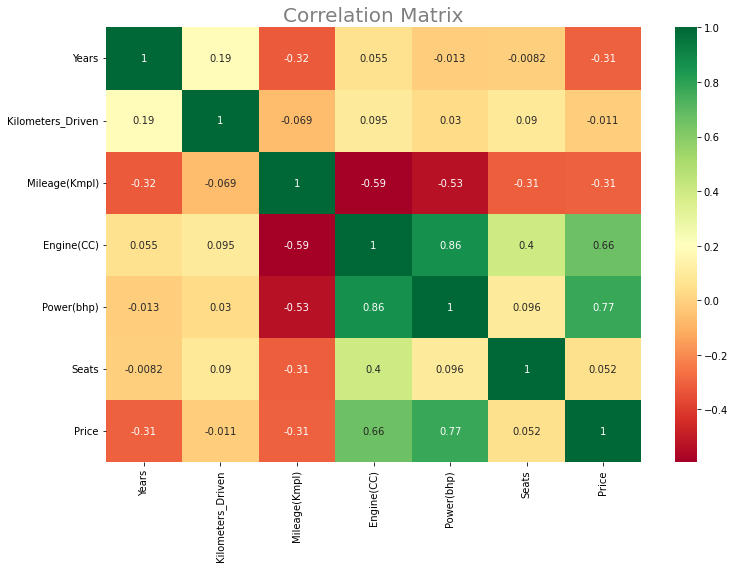

In [105]:
# Plot heatmap for correlation matrix

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix',fontsize=20,alpha=0.5)
plt.show()

* As we can see Engine and Power are highly co-related with each other. Also Engine, Power has a decent co-relation with the response variable,i.e, `Price`

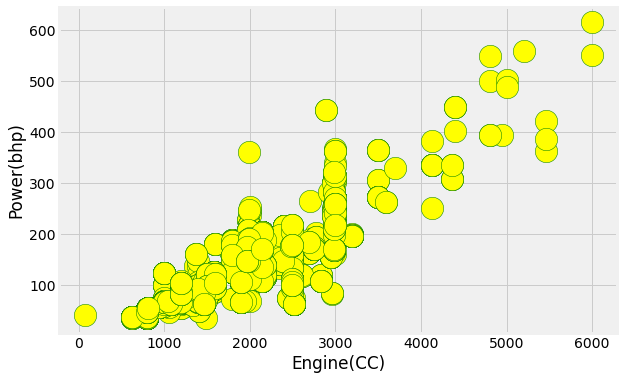

In [106]:
from matplotlib import style
plt.figure(figsize=(10,6))
with plt.style.context("fivethirtyeight"):
    plt.scatter(df["Engine(CC)"],df["Power(bhp)"],s=500,ec="g",color="yellow")
plt.grid(True)
plt.xlabel("Engine(CC)")
plt.ylabel("Power(bhp)")
plt.show()

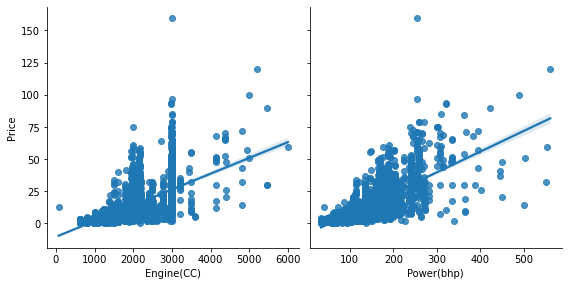

In [107]:
sns.pairplot(df, x_vars=['Engine(CC)', 'Power(bhp)'], y_vars='Price',size=4,kind="reg")
plt.show()

### Detecting and Treating Outliers

In [109]:
df.isna().sum()

Years                   0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(Kmpl)           2
Engine(CC)             46
Power(bhp)            175
Seats                  53
Price                1233
Manufacturer            0
dtype: int64

In [110]:
df.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95])

,Years,Kilometers_Driven,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price
count,7252.000000,7.252000e+03,7250.000000,7206.000000,7077.000000,7199.000000,6019.000000
mean,9.634170,5.869999e+04,18.141738,1616.590064,112.764474,5.279761,9.479468
std,3.254405,8.443351e+04,4.562492,595.324779,53.497297,0.811709,11.187917
min,4.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,7.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,3.500000
50%,9.000000,5.342900e+04,18.160000,1493.000000,94.000000,5.000000,5.640000
75%,12.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000
90%,14.000000,9.742290e+04,24.000000,2494.000000,184.000000,7.000000,22.500000
95%,16.000000,1.202466e+05,25.440000,2982.000000,204.000000,7.000000,32.446000
max,27.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000


#### Visualising Continuous Variables

There are a few continuous variables. Making a boxplot for some of these variables.

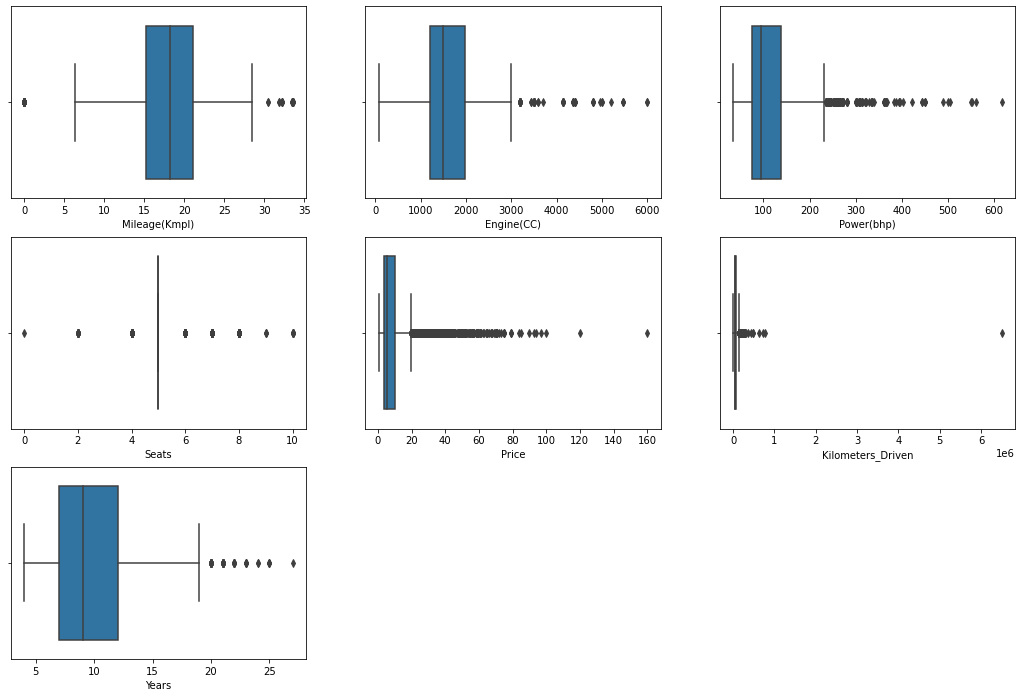

In [111]:
plt.figure(figsize=(18,12))
plt.subplot(3,3,1)
sns.boxplot(data=df,x="Mileage(Kmpl)")
plt.subplot(3,3,2)
sns.boxplot(data=df,x="Engine(CC)")
plt.subplot(3,3,3)
sns.boxplot(data=df,x="Power(bhp)")
plt.subplot(3,3,4)
sns.boxplot(data=df,x="Seats")
plt.subplot(3,3,5)
sns.boxplot(data=df,x="Price")
plt.subplot(3,3,6)
sns.boxplot(data=df,x="Kilometers_Driven")
plt.subplot(3,3,7)
sns.boxplot(data=df,x="Years")
plt.show()

 As we can see from statistical information of the dataset and the boxplot above, some feature variables have outliers. 
 `Outliers` are the values within a dataset that vary greatly from other datapoints.
 Following are Outliers -- 
* **Kilometers_Driven**: Other datapoints are gradually increasing but one datapoint is far away from others. 
    So it might be a mistake by chance.
* **Mileage(Kmpl)**: Since any car have some mileage, 'Zero' mileage is not possible.
* **Engine(CC)**: Engine of 72 CC for car is not possible.
* **Power(bhp)**: Power of 34.2 bhp is not possible to drive any car since it is too low.

**Note** -- For **Seats** variable, since 'Zero' seat of any car is not possible but still we are not treating this outlier since treating will 
eliminate `two seats`, `three seats` and `four seats` data.

In [209]:
#Treating Outliers for Mileage(Kmpl), Engine(CC), Power(bhp)

varlist=["Mileage(Kmpl)", "Engine(CC)", "Power(bhp)"]
for i in varlist:
    per25=df[i].quantile(0.25)
    per75=df[i].quantile(0.75)
    IQR=per75-per25
    lower_limit=per25-1.5*IQR
    upper_limit=per75+1.5*IQR
    df=df[df[i]>lower_limit]

In [210]:
#Treating Outliers for Kilometers_Driven

per25=df["Kilometers_Driven"].quantile(0.25)
per75=df["Kilometers_Driven"].quantile(0.75)
IQR=per75-per25
lower_limit=per25-1.5*IQR
upper_limit=per75+1.5*IQR
df=df[df["Kilometers_Driven"]<upper_limit]

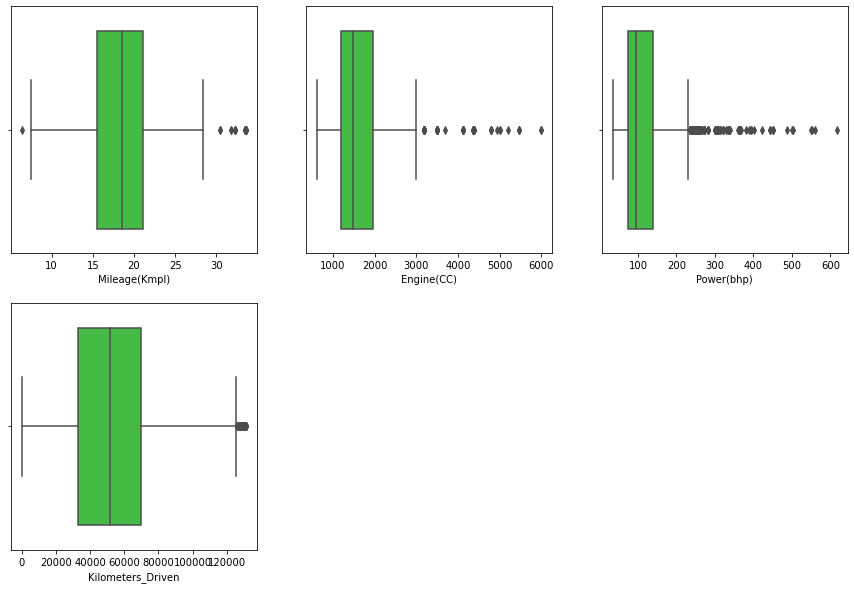

In [114]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(data=df,x="Mileage(Kmpl)",color="limegreen")
plt.subplot(2,3,2)
sns.boxplot(data=df,x="Engine(CC)",color="limegreen")
plt.subplot(2,3,3)
sns.boxplot(data=df,x="Power(bhp)",color="limegreen")
plt.subplot(2,3,4)
sns.boxplot(data=df,x="Kilometers_Driven",color="limegreen")
plt.show()

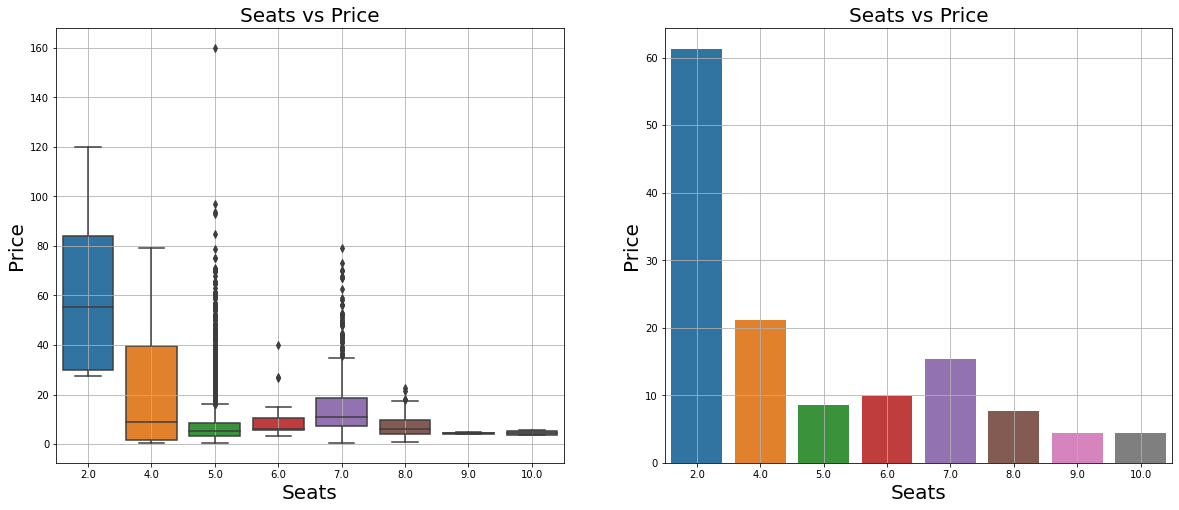

In [115]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x='Seats', y='Price', data=df)
plt.xlabel('Seats',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Seats vs Price',fontsize=20)
plt.grid()
plt.subplot(1,2,2)
sns.barplot(x='Seats', y='Price', data=df,ci=None)
plt.xlabel('Seats',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Seats vs Price',fontsize=20)
plt.grid()
plt.show()

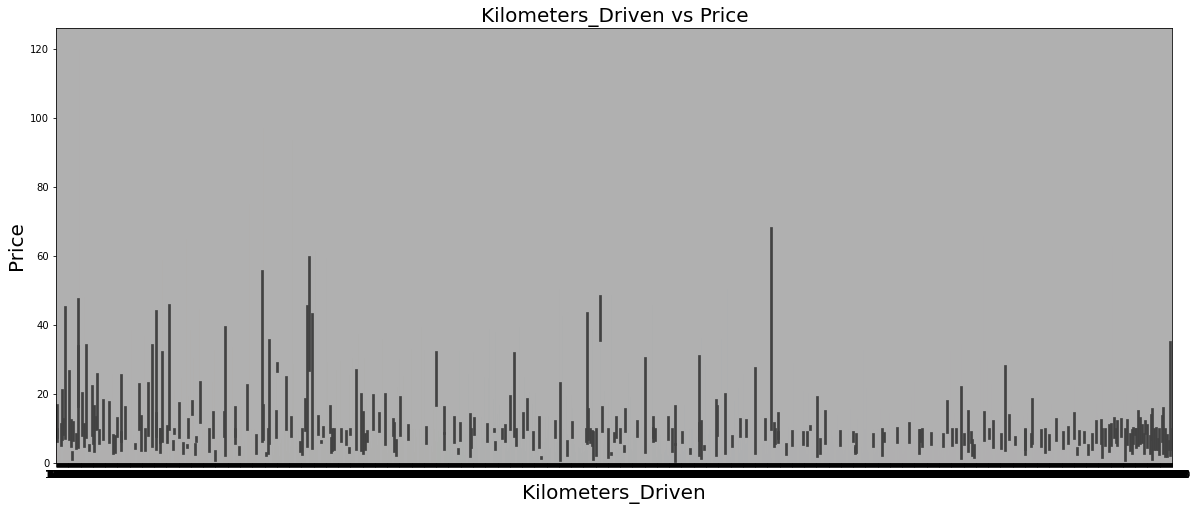

In [92]:
plt.figure(figsize=(20,8))
sns.barplot(x='Kilometers_Driven', y='Price', data=df)
plt.xlabel('Kilometers_Driven',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Kilometers_Driven vs Price',fontsize=20)
plt.grid(True)
plt.show()

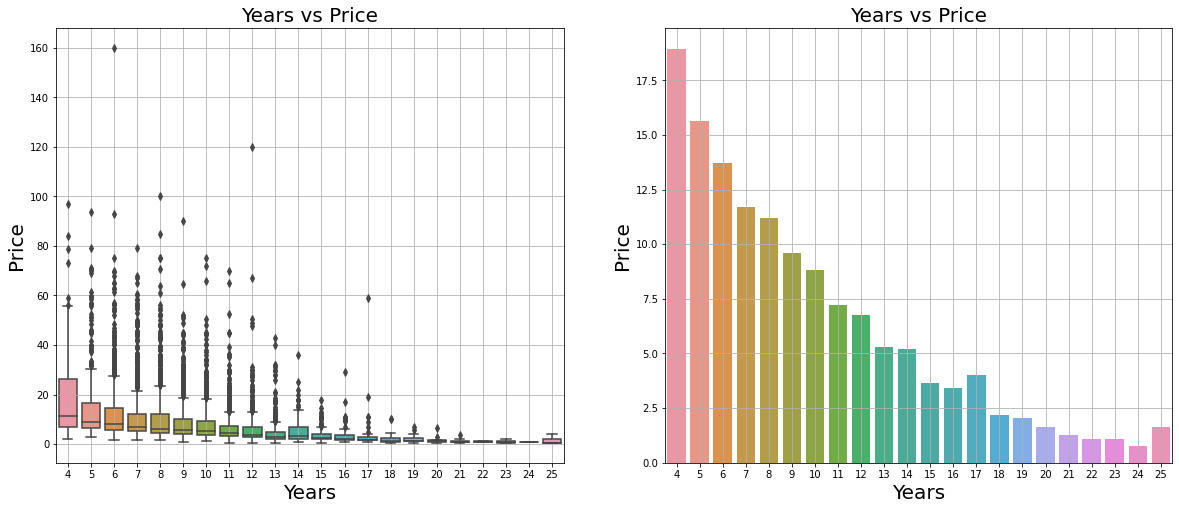

In [43]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.boxplot(x='Years', y='Price', data=df)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Years vs Price',fontsize=20)
plt.grid()
plt.subplot(1,2,2)
sns.barplot(x='Years', y='Price', data=df,ci=None)
plt.xlabel('Years',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Years vs Price',fontsize=20)
plt.grid()
plt.show()

#### Visualising Categorical Variables

There are a few categorical variables. Making a barplot for some of these variables.

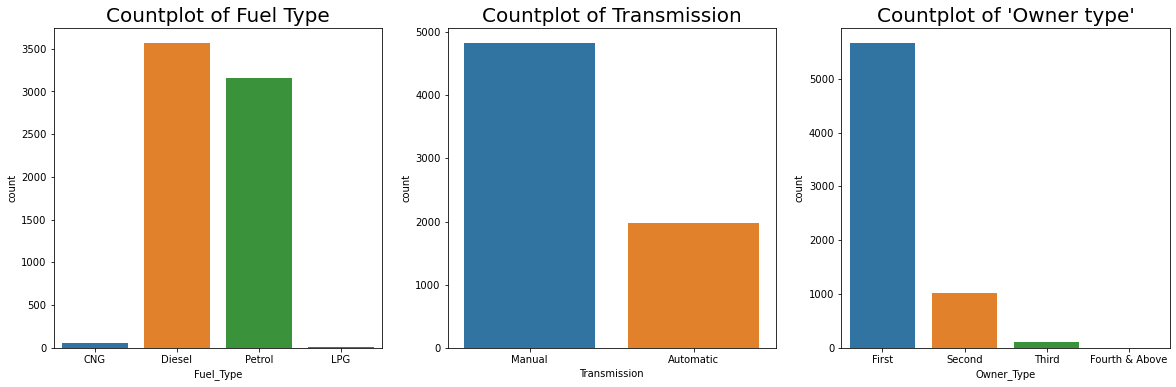

In [44]:
# Ploted countplot for categorical features

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.countplot(df['Fuel_Type'])
plt.title("Countplot of Fuel Type",fontsize=20)
plt.subplot(3,3,2)
sns.countplot(df['Transmission'])
plt.title("Countplot of Transmission",fontsize=20)
plt.subplot(3,3,3)
sns.countplot(df['Owner_Type'])
plt.title("Countplot of 'Owner type'",fontsize=20)
plt.show()

As we can see from the above plots, 
* Most of the cars are of `Diesel` and `Petrol` fuel types.
* Moreover `Manual` transmission cars are the most.
* And `First Owner` type cars(or we can First Hand cars) are the maximum.

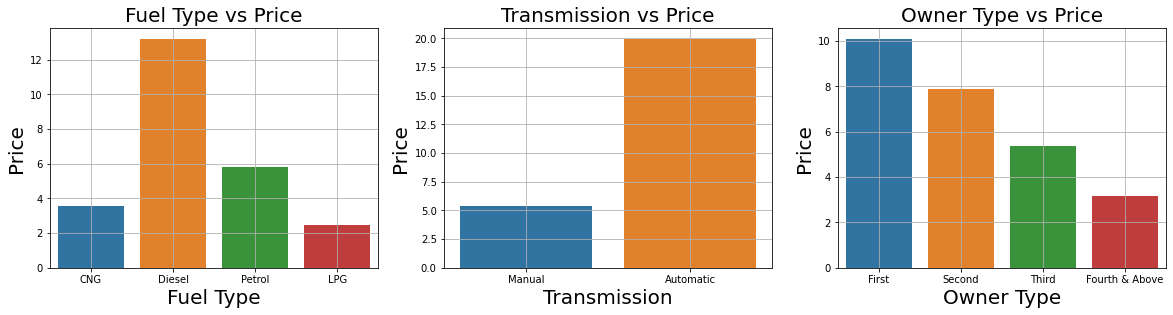

In [45]:
# Ploted barplot plot for categorical features

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.barplot(x='Fuel_Type', y='Price', data=df,ci=None)
plt.xlabel('Fuel Type',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Fuel Type vs Price',fontsize=20)
plt.grid()
plt.subplot(3,3,2)
sns.barplot(x='Transmission', y='Price', data=df,ci=None)
plt.xlabel('Transmission',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Transmission vs Price',fontsize=20)
plt.grid(True)
plt.subplot(3,3,3)
sns.barplot(x='Owner_Type', y='Price', data=df,ci=None)
plt.xlabel('Owner Type',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.title('Owner Type vs Price',fontsize=20)
plt.grid()
plt.show()

From the plot we can conclude that,
* `Diesel` type cars have higher price as compared to CNG, Petrol and LPG.
* Moreover `Automatic Transmission` cars have higher price as compared to Manual ones.
* And Price of `First Owner` type cars is high as compared to remaining ones.

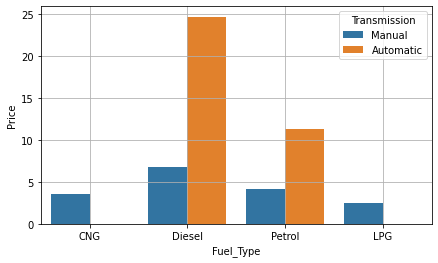

In [46]:
plt.figure(figsize = (7, 4))
sns.barplot(x = 'Fuel_Type', y = 'Price', hue = 'Transmission', data = df,ci=None)
plt.grid(True)
plt.show()

* As we can see, cars of `Diesel` and `Automatic` types are of higher price.

### Treating Null Values

In [211]:
# Checking shape after treating outliers

df.shape

(6795, 11)

In [212]:
# Checking null value after treating outliers

df.isna().sum()

Years                   0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage(Kmpl)           0
Engine(CC)              0
Power(bhp)              0
Seats                   1
Price                1143
Manufacturer            0
dtype: int64

In [213]:
df.fillna({"Price":df["Price"].mean()},inplace=True)

* Here we are treating the `null values` of **Price** column, i.e, `Response variable` with **Mean** since it might contains outliers.

In [214]:
df.dropna(subset="Seats",inplace=True)

* Here we are dropping row containing `null values` in **Seats** variable because there is only one null value out of 6795 entries.

In [215]:
# Checking null values after treating null values
df.isna().sum()

Years                0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage(Kmpl)        0
Engine(CC)           0
Power(bhp)           0
Seats                0
Price                0
Manufacturer         0
dtype: int64

In [216]:
df.shape

(6794, 11)

* As we can see there is no null value in our dataset.

In [217]:
df['Mileage(Kmpl)'] = df['Mileage(Kmpl)'].astype(float)
df['Engine(CC)'] = df['Engine(CC)'].astype(float)

In [218]:
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

### Data Tarnsformation

In [219]:
col_names=["Transmission"]
def binarymap(x):
    return x.map({"Manual":0,"Automatic":1})

df[col_names]=df[col_names].apply(binarymap)

* Here we are doing **Label Encoding** of `Transmission` column, i.e, transforming `Manual` to **0** and `Automatic` to **1**.

In [220]:
df.head(2)

,Years,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price,Manufacturer
0,13,72000,CNG,0,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,8,41000,Diesel,0,First,19.67,1582.0,126.20,5.0,12.50,Hyundai


In [221]:
# Creating dummy variables for the variable 'Fuel_Type'

ml = pd.get_dummies(df['Fuel_Type'])
# Dropping LPG column
ml1 = ml.drop(['LPG'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'Owner_Type'.
os = pd.get_dummies(df['Owner_Type'])
# Dropping Fourth & Above column
os1 = os.drop(['Fourth & Above'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'Manufacturer'. 
dp = pd.get_dummies(df['Manufacturer'], prefix='Manufacturer')
dp1 = dp.drop(['Manufacturer_Jaguar'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

* Here we are doing **Dummification** of variables - `Fuel_Type`, `Owner_Type` and `Manufacturer`. 

In [222]:
df.head(2)

,Years,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,13,72000,CNG,0,First,26.60,998.0,58.16,5.0,1.75,...,0,0,0,0,0,0,0,0,0,0
1,8,41000,Diesel,0,First,19.67,1582.0,126.20,5.0,12.50,...,0,0,0,0,0,0,0,0,0,0


In [223]:
# Dropping variables - Fuel_Type and Owner_Type

df.drop(["Fuel_Type","Owner_Type","Manufacturer"],axis=1,inplace=True)

In [224]:
df.head(15)

,Years,Kilometers_Driven,Transmission,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price,CNG,Diesel,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,13,72000,0,26.60,998.0,58.16,5.0,1.75,1,0,...,0,0,0,0,0,0,0,0,0,0
1,8,41000,0,19.67,1582.0,126.20,5.0,12.50,0,1,...,0,0,0,0,0,0,0,0,0,0
2,12,46000,0,18.20,1199.0,88.70,5.0,4.50,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,87000,0,20.77,1248.0,88.76,7.0,6.00,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10,40670,1,15.20,1968.0,140.80,5.0,17.74,0,1,...,0,0,0,0,0,0,0,0,0,0
5,11,75000,0,21.10,814.0,55.20,5.0,2.35,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10,86999,0,23.08,1461.0,63.10,5.0,3.50,0,1,...,0,1,0,0,0,0,0,0,0,0
7,7,36000,1,11.36,2755.0,171.50,8.0,17.50,0,1,...,0,0,0,0,0,0,0,1,0,0
8,10,64430,0,20.54,1598.0,103.60,5.0,5.20,0,1,...,0,0,0,0,0,0,0,0,1,0
9,11,65932,0,22.30,1248.0,74.00,5.0,1.95,0,1,...,0,0,0,0,0,0,1,0,0,0


In [225]:
df.shape

(6794, 44)

## Building Model using Linear Regression Algorithm

In [226]:
# Importing train_test_split method from sklearn library

from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

### Feature Scaling 

In [227]:
varlist=["Years", "Kilometers_Driven", "Mileage(Kmpl)", "Engine(CC)", "Power(bhp)", "Seats", "Price"]

In [228]:
# importing MinMaxScaler package from sklearn library

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [229]:
features=df_train[varlist]
df_train[varlist]=scaler.fit_transform(features)

In [230]:
df_train.head(3)

,Years,Kilometers_Driven,Transmission,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,Price,CNG,Diesel,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
2975,0.238095,0.247109,0,0.516518,0.106624,0.099652,0.375,0.036260,0,0,...,0,0,0,0,0,0,0,0,0,0
4100,0.333333,0.717188,0,0.554217,0.106997,0.076671,0.375,0.040779,0,1,...,0,0,0,0,0,0,0,0,1,0
4400,0.380952,0.350297,0,0.289545,0.181243,0.133835,0.375,0.019184,0,0,...,0,0,0,0,0,0,0,0,1,0


In [231]:
# Segregating "Price" variable into y_train dataset from df_train

y_train=df_train.pop("Price")
X_train=df_train

In [232]:
X_train.head(3)

,Years,Kilometers_Driven,Transmission,Mileage(Kmpl),Engine(CC),Power(bhp),Seats,CNG,Diesel,Petrol,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
2975,0.238095,0.247109,0,0.516518,0.106624,0.099652,0.375,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4100,0.333333,0.717188,0,0.554217,0.106997,0.076671,0.375,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4400,0.380952,0.350297,0,0.289545,0.181243,0.133835,0.375,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [233]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [234]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [235]:
X_train.shape

(4755, 43)

In [236]:
rfe = RFE(estimator=lm, n_features_to_select=33)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [237]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Years', True, 1),
 ('Kilometers_Driven', False, 2),
 ('Transmission', False, 8),
 ('Mileage(Kmpl)', False, 7),
 ('Engine(CC)', True, 1),
 ('Power(bhp)', True, 1),
 ('Seats', True, 1),
 ('CNG', False, 4),
 ('Diesel', False, 6),
 ('Petrol', False, 5),
 ('First', True, 1),
 ('Second', True, 1),
 ('Third', True, 1),
 ('Manufacturer_Ambassador', False, 9),
 ('Manufacturer_Audi', True, 1),
 ('Manufacturer_BMW', True, 1),
 ('Manufacturer_Bentley', True, 1),
 ('Manufacturer_Chevrolet', True, 1),
 ('Manufacturer_Datsun', True, 1),
 ('Manufacturer_Fiat', True, 1),
 ('Manufacturer_Force', True, 1),
 ('Manufacturer_Ford', True, 1),
 ('Manufacturer_Honda', True, 1),
 ('Manufacturer_Hyundai', True, 1),
 ('Manufacturer_ISUZU', True, 1),
 ('Manufacturer_Isuzu', False, 11),
 ('Manufacturer_Jeep', True, 1),
 ('Manufacturer_Lamborghini', False, 10),
 ('Manufacturer_Land', True, 1),
 ('Manufacturer_Mahindra', True, 1),
 ('Manufacturer_Maruti', True, 1),
 ('Manufacturer_Mercedes-Benz', True, 1),
 ('Manu

In [238]:
col = X_train.columns[rfe.support_]
col

Index(['Years', 'Engine(CC)', 'Power(bhp)', 'Seats', 'First', 'Second',
       'Third', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Bentley', 'Manufacturer_Chevrolet', 'Manufacturer_Datsun',
       'Manufacturer_Fiat', 'Manufacturer_Force', 'Manufacturer_Ford',
       'Manufacturer_Honda', 'Manufacturer_Hyundai', 'Manufacturer_ISUZU',
       'Manufacturer_Jeep', 'Manufacturer_Land', 'Manufacturer_Mahindra',
       'Manufacturer_Maruti', 'Manufacturer_Mercedes-Benz',
       'Manufacturer_Mitsubishi', 'Manufacturer_Nissan',
       'Manufacturer_OpelCorsa', 'Manufacturer_Porsche',
       'Manufacturer_Renault', 'Manufacturer_Skoda', 'Manufacturer_Tata',
       'Manufacturer_Toyota', 'Manufacturer_Volkswagen', 'Manufacturer_Volvo'],
      dtype='object')

In [239]:
X_train.columns[~rfe.support_]

Index(['Kilometers_Driven', 'Transmission', 'Mileage(Kmpl)', 'CNG', 'Diesel',
       'Petrol', 'Manufacturer_Ambassador', 'Manufacturer_Isuzu',
       'Manufacturer_Lamborghini', 'Manufacturer_Mini'],
      dtype='object')

In [240]:
X_train_rfe = X_train[col]

In [241]:
import statsmodels.api as sm  
X_train_rfe_sm = sm.add_constant(X_train_rfe)

In [242]:
lm = sm.OLS(y_train,X_train_rfe_sm).fit()

In [243]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     284.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:42:39   Log-Likelihood:                 6817.6
No. Observations:                4755   AIC:                        -1.357e+04
Df Residuals:                    4721   BIC:                        -1.335e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [244]:
X_train_rfe1=X_train_rfe.drop("First",axis=1)

In [245]:
X_train_rfe1.head()

,Years,Engine(CC),Power(bhp),Seats,Second,Third,Manufacturer_Audi,Manufacturer_BMW,Manufacturer_Bentley,Manufacturer_Chevrolet,...,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_OpelCorsa,Manufacturer_Porsche,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
2975,0.238095,0.106624,0.099652,0.375,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4100,0.333333,0.106997,0.076671,0.375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4400,0.380952,0.181243,0.133835,0.375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2776,0.095238,0.116115,0.076864,0.375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5951,0.238095,0.162449,0.161839,0.375,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [246]:
X_train_rfe1_sm=sm.add_constant(X_train_rfe1)
lm2=sm.OLS(y_train,X_train_rfe1_sm).fit()

In [247]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     292.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:43:06   Log-Likelihood:                 6817.1
No. Observations:                4755   AIC:                        -1.357e+04
Df Residuals:                    4722   BIC:                        -1.335e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [248]:
X_train_rfe2=X_train_rfe1.drop("Third",axis=1)

In [249]:
X_train_rfe2_sm=sm.add_constant(X_train_rfe2)
lm3=sm.OLS(y_train,X_train_rfe2_sm).fit()

In [250]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     302.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:43:18   Log-Likelihood:                 6817.1
No. Observations:                4755   AIC:                        -1.357e+04
Df Residuals:                    4723   BIC:                        -1.336e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [251]:
X_train_rfe3=X_train_rfe2.drop("Second",axis=1)

In [252]:
X_train_rfe3_sm=sm.add_constant(X_train_rfe3)
lm4=sm.OLS(y_train,X_train_rfe3_sm).fit()

In [253]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     312.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:43:29   Log-Likelihood:                 6816.7
No. Observations:                4755   AIC:                        -1.357e+04
Df Residuals:                    4724   BIC:                        -1.337e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [254]:
X_train_rfe4=X_train_rfe3.drop("Manufacturer_OpelCorsa",axis=1)

In [255]:
X_train_rfe4_sm=sm.add_constant(X_train_rfe4)
lm5=sm.OLS(y_train,X_train_rfe4_sm).fit()

In [256]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     323.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:43:39   Log-Likelihood:                 6816.6
No. Observations:                4755   AIC:                        -1.357e+04
Df Residuals:                    4725   BIC:                        -1.338e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [257]:
X_train_rfe5=X_train_rfe4.drop("Manufacturer_Bentley",axis=1)

In [258]:
X_train_rfe5_sm=sm.add_constant(X_train_rfe5)
lm6=sm.OLS(y_train,X_train_rfe5_sm).fit()

In [259]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     334.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):               0.00
Time:                        19:43:49   Log-Likelihood:                 6816.1
No. Observations:                4755   AIC:                        -1.357e+04
Df Residuals:                    4726   BIC:                        -1.339e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#### Predicting Trained Data

In [260]:
y_train_pred=lm6.predict(X_train_rfe5_sm)
res=y_train-y_train_pred

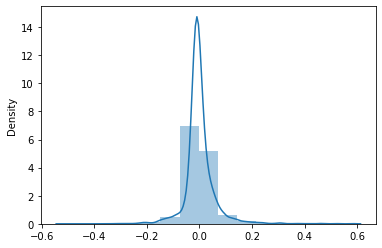

In [261]:
sns.distplot(res,bins=15)
plt.show()

#### Working with Testing data

In [271]:
print(varlist)

['Years', 'Kilometers_Driven', 'Mileage(Kmpl)', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price']


In [262]:
feature=df_test[varlist]
df_test[varlist]=scaler.transform(feature)

In [263]:
y_test=df_test.pop("Price")
X_test=df_test

In [264]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe5.columns]

# Adding a constant variable 
X_test_new_sm = sm.add_constant(X_test_new)

### Predictions

In [265]:
y_test_pred = lm6.predict(X_test_new_sm)

In [266]:
res1=y_test-y_test_pred

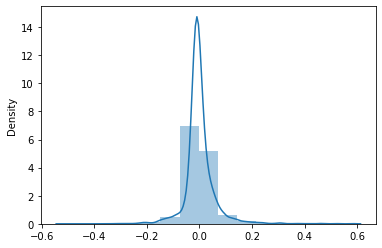

In [267]:
sns.distplot(res,bins=15)
plt.show()

### Model Evaluation

Text(0, 0.5, 'y_test_pred')

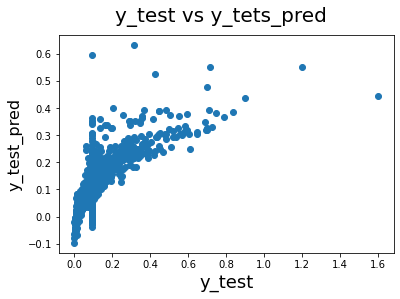

In [268]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_tets_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)                          # Y-label

### Calculating Error Terms

In [269]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)

In [270]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004704945509464641
r_square_value : 0.6251238914256867


## Building Model using Random Forest

In [272]:
from sklearn.ensemble import RandomForestRegressor

In [273]:
Rf = RandomForestRegressor(n_estimators = 15,
                              criterion = 'mse',
                              random_state = 20,
                              n_jobs = -1)
Rf.fit(X_train,y_train)

RandomForestRegressor(criterion='mse', n_estimators=15, n_jobs=-1,
                      random_state=20)

In [274]:
Rf_train_pred = Rf.predict(X_train)
Rf_test_pred = Rf.predict(X_test)


r2_score(y_test,Rf_test_pred)

0.7511290307682695